In [1]:
import pandas as pd
import json

df_LIS = pd.read_excel('../data/Elsevier-LIS/Texts.xlsx')
with open('../data/Elsevier-LIS/Keywords.json', 'r') as f:
    keywords_LIS = json.load(f)

df_CS = pd.read_excel('../data/Elsevier-CS/Texts_3000.xlsx')
with open('../data/Elsevier-CS/Keywords.json', 'r') as f:
    keywords_CS = json.load(f)

1. 关键词分布

In [2]:
import matplotlib.pyplot as plt

keyword_items_LIS = list(keywords_LIS.values())
keyword_lengths_LIS = [len(keyword_item) for keyword_item in keyword_items_LIS]
x = [i for i in range(3, 7)]
y_LIS = [keyword_lengths_LIS.count(i) for i in range(3, 7)]

keyword_items_CS = list(keywords_CS.values())
keyword_lengths_CS = [len(keyword_item) for keyword_item in keyword_items_CS]
y_CS = [keyword_lengths_CS.count(i) for i in range(3, 7)]

# plt.plot(x, y_LIS, linestyle='--', marker='s', color='r')
# plt.grid(True)
# plt.show()

2. 摘要中句子数量分布

In [3]:
abs_LIS = df_LIS['Abstract'].tolist()
ab_sens_LIS = [len(ab.split('. ')) for ab in abs_LIS]
abs_CS = df_LIS['Abstract'].tolist()
ab_sens_CS = [len(ab.split('. ')) for ab in abs_CS]

# plt.hist(ab_sens_LIS)
# plt.show()

3. highlight数量分布

In [4]:
hts_LIS = df_LIS['Highlights'].tolist()
ht_sens_LIS = [len(ht.split(';')) for ht in hts_LIS]
hts_CS = df_CS['Highlights'].tolist()
ht_sens_CS = [len(ht.split(';')) for ht in hts_CS]

# plt.boxplot(ht_sens)
# plt.show()

将来自两个数据集的数据图全部进行绘制

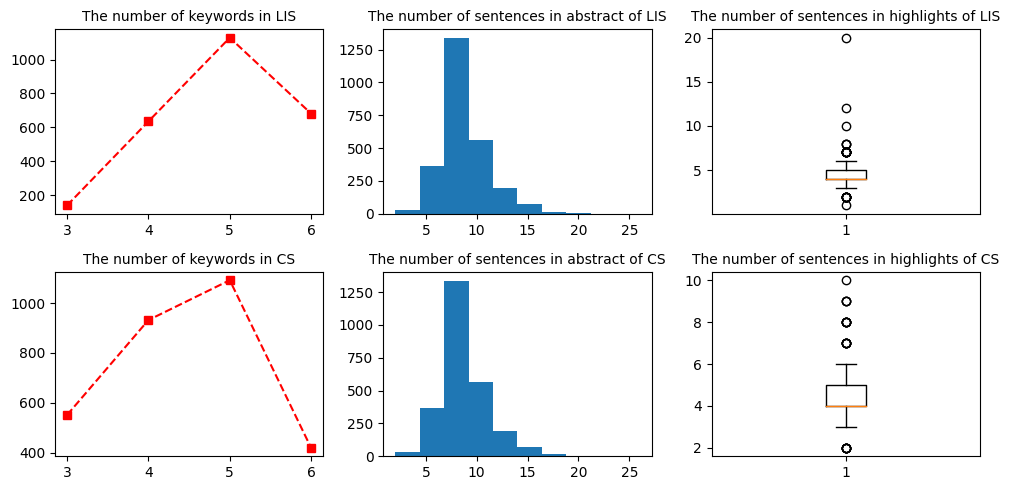

In [11]:
fig, axs = plt.subplots(2,3,figsize=(10,5))
axs[0,0].plot(x, y_LIS, linestyle='--', marker='s', color='r')
axs[0,0].set_title('The number of keywords in LIS', fontsize=10)

axs[0,1].hist(ab_sens_LIS)
axs[0,1].set_title('The number of sentences in abstract of LIS', fontsize=10)

axs[0,2].boxplot(ht_sens_LIS)
axs[0,2].set_title('The number of sentences in highlights of LIS', fontsize=10)

axs[1,0].plot(x, y_CS, linestyle='--', marker='s', color='r')
axs[1,0].set_title('The number of keywords in CS', fontsize=10)

axs[1,1].hist(ab_sens_CS)
axs[1,1].set_title('The number of sentences in abstract of CS', fontsize=10)

axs[1,2].boxplot(ht_sens_CS)
axs[1,2].set_title('The number of sentences in highlights of CS', fontsize=10)

plt.tight_layout()
plt.show()

4. 抽取性能随句子数量变化情况

In [15]:
df = pd.read_excel('FilterAbstract/record.xlsx', sheet_name='LIS')
values = []
for index, row in df.iterrows():
    element = row[1:13]
    value = []
    for elem in element:
        value.append(elem)
    values.append(value)  

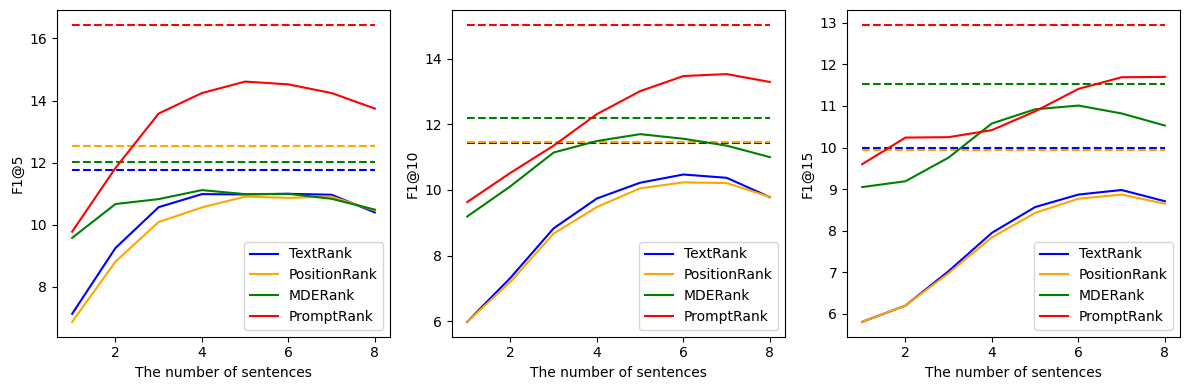

In [14]:
import matplotlib.pyplot as plt

# CS
x = [i for i in range(1,9)]
models = ['TextRank', 'PositionRank', 'MDERank', 'PromptRank']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

axes[0].plot(x, values[0], label= models[0], color='blue')
axes[0].plot(x, [11.76]*len(x), linestyle='--', color='blue')
axes[0].plot(x, values[1], label= models[1], color='orange')
axes[0].plot(x, [12.52]*len(x), linestyle='--', color='orange')
axes[0].plot(x, values[2], label= models[2], color='green')
axes[0].plot(x, [12.02]*len(x), linestyle='--', color='green')
axes[0].plot(x, values[3], label= models[3], color='red')
axes[0].plot(x, [16.44]*len(x), linestyle='--', color='red')
axes[0].legend()
axes[0].set_xlabel('The number of sentences')
axes[0].set_ylabel('F1@5')

axes[1].plot(x, values[4], label= models[0], color='blue')
axes[1].plot(x, [11.43]*len(x), linestyle='--', color='blue')
axes[1].plot(x, values[5], label= models[1], color='orange')
axes[1].plot(x, [11.46]*len(x), linestyle='--', color='orange')
axes[1].plot(x, values[6], label= models[2], color='green')
axes[1].plot(x, [12.18]*len(x), linestyle='--', color='green')
axes[1].plot(x, values[7], label= models[3], color='red')
axes[1].plot(x, [15.03]*len(x), linestyle='--', color='red')
axes[1].legend()
axes[1].set_xlabel('The number of sentences')
axes[1].set_ylabel('F1@10')

axes[2].plot(x, values[8], label= models[0], color='blue')
axes[2].plot(x, [9.99]*len(x), linestyle='--', color='blue')
axes[2].plot(x, values[9], label= models[1], color='orange')
axes[2].plot(x, [9.94]*len(x), linestyle='--', color='orange')
axes[2].plot(x, values[10], label= models[2], color='green')
axes[2].plot(x, [11.54]*len(x), linestyle='--', color='green')
axes[2].plot(x, values[11], label= models[3], color='red')
axes[2].plot(x, [12.95]*len(x), linestyle='--', color='red')
axes[2].legend()
axes[2].set_xlabel('The number of sentences')
axes[2].set_ylabel('F1@15')

plt.tight_layout()
plt.show()

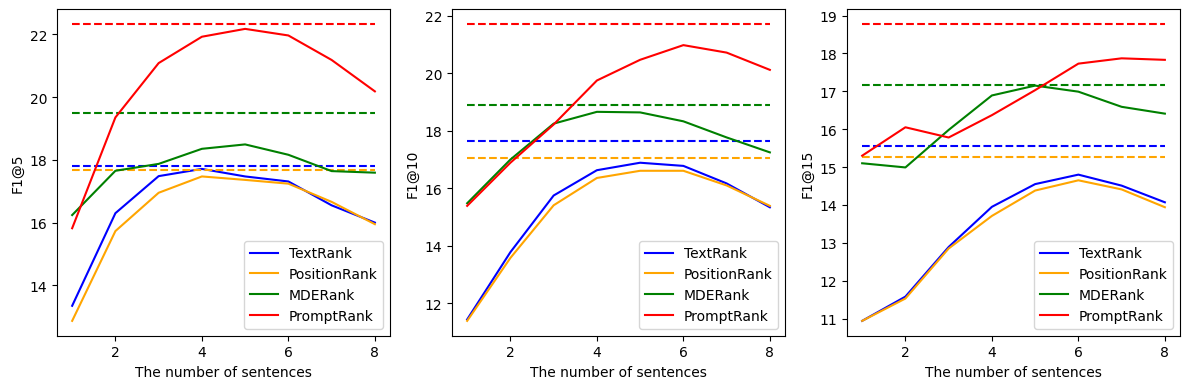

In [16]:
x = [i for i in range(1,9)]
models = ['TextRank', 'PositionRank', 'MDERank', 'PromptRank']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

axes[0].plot(x, values[0], label= models[0], color='blue')
axes[0].plot(x, [17.79]*len(x), linestyle='--', color='blue')
axes[0].plot(x, values[1], label= models[1], color='orange')
axes[0].plot(x, [17.68]*len(x), linestyle='--', color='orange')
axes[0].plot(x, values[2], label= models[2], color='green')
axes[0].plot(x, [19.48]*len(x), linestyle='--', color='green')
axes[0].plot(x, values[3], label= models[3], color='red')
axes[0].plot(x, [22.33]*len(x), linestyle='--', color='red')
axes[0].legend()
axes[0].set_xlabel('The number of sentences')
axes[0].set_ylabel('F1@5')

axes[1].plot(x, values[4], label= models[0], color='blue')
axes[1].plot(x, [17.66]*len(x), linestyle='--', color='blue')
axes[1].plot(x, values[5], label= models[1], color='orange')
axes[1].plot(x, [17.06]*len(x), linestyle='--', color='orange')
axes[1].plot(x, values[6], label= models[2], color='green')
axes[1].plot(x, [18.91]*len(x), linestyle='--', color='green')
axes[1].plot(x, values[7], label= models[3], color='red')
axes[1].plot(x, [21.72]*len(x), linestyle='--', color='red')
axes[1].legend()
axes[1].set_xlabel('The number of sentences')
axes[1].set_ylabel('F1@10')

axes[2].plot(x, values[8], label= models[0], color='blue')
axes[2].plot(x, [15.56]*len(x), linestyle='--', color='blue')
axes[2].plot(x, values[9], label= models[1], color='orange')
axes[2].plot(x, [15.26]*len(x), linestyle='--', color='orange')
axes[2].plot(x, values[10], label= models[2], color='green')
axes[2].plot(x, [17.17]*len(x), linestyle='--', color='green')
axes[2].plot(x, values[11], label= models[3], color='red')
axes[2].plot(x, [18.78]*len(x), linestyle='--', color='red')
axes[2].legend()
axes[2].set_xlabel('The number of sentences')
axes[2].set_ylabel('F1@15')

plt.tight_layout()
plt.show()

5. 摘要和Highlight中关键词分布密度

5.1 抽取关键词

In [8]:
from stanfordcorenlp import StanfordCoreNLP
import nltk
from nltk.corpus import stopwords

en_model = StanfordCoreNLP(r'G://Dataset/StanfordCoreNLP/stanford-corenlp-full-2018-02-27/', quiet=True)
stopword_dict = set(stopwords.words('english'))

GRAMMAR1 = """  NP:
        {<NN.*|JJ>*<NN.*>}  # Adjective(s)(optional) + Noun(s)"""

def extract_candidates(tokens_tagged, no_subset=False):
    """
    Based on part of speech return a list of candidate phrases
    :param text_obj: Input text Representation see @InputTextObj
    :param no_subset: if true won't put a candidate which is the subset of an other candidate
    :return keyphrase_candidate: list of list of candidate phrases: [tuple(string,tuple(start_index,end_index))]
    """
    np_parser = nltk.RegexpParser(GRAMMAR1)  # Noun phrase parser
    keyphrase_candidate = []
    np_pos_tag_tokens = np_parser.parse(tokens_tagged)
    count = 0
    for token in np_pos_tag_tokens:
        if (isinstance(token, nltk.tree.Tree) and token._label == "NP"):
            np = ' '.join(word for word, tag in token.leaves())
            length = len(token.leaves())
            start_end = (count, count + length)
            count += length
            keyphrase_candidate.append((np, start_end))

        else:
            count += 1

    return keyphrase_candidate

In [9]:
from tqdm import tqdm

def extract(sentences):
    keyphrase_candidates = []
    for i, text in enumerate(tqdm(sentences)):
        tokens = en_model.word_tokenize(text)
        tokens_tagged = en_model.pos_tag(text)
        keyphrase_candidate = extract_candidates(tokens_tagged, en_model)
        keyphrase_candidates.append(keyphrase_candidate)

    return keyphrase_candidates

In [10]:
h_lis = df_LIS['Highlights'].tolist()
h_cs = df_CS['Highlights'].tolist()
a_lis = df_LIS['Abstract'].tolist()
a_cs = df_CS['Abstract'].tolist()

h_lis_candidates = extract(h_lis)
h_cs_candidates = extract(h_cs)
a_lis_candidates = extract(a_lis)
a_cs_candidates = extract(a_cs)

100%|██████████| 2996/2996 [01:58<00:00, 25.25it/s]


In [15]:
def save(file_path, data):
    new_items = []
    for item in data:
        new_words = []
        for keyword in item:
            new_words.append(keyword[0])
        new_items.append(new_words)

    with open(file_path, 'w') as f:
        json.dump(new_items, f)

In [16]:
save('CandidateKeywords/HLIS.json', h_lis_candidates)
save('CandidateKeywords/HCS.json', h_cs_candidates)
save('CandidateKeywords/ALIS.json', a_lis_candidates)
save('CandidateKeywords/ACS.json', a_cs_candidates)

5.2 对比候选关键词与金标准关键词

In [2]:
with open('CandidateKeywords/HLIS.json', 'r') as f:
    h_lis_candidates = json.load(f)

with open('CandidateKeywords/HCS.json', 'r') as f:
    h_cs_candidates = json.load(f)

with open('CandidateKeywords/ALIS.json', 'r') as f:
    a_lis_candidates = json.load(f)

with open('CandidateKeywords/ACS.json', 'r') as f:
    a_cs_candidates = json.load(f)

In [6]:
lis_golds, cs_golds = [], []
lis_links = df_LIS['Pii'].tolist()
cs_links = df_CS['Pii'].tolist()

for link in lis_links:
    try:
        lis_golds.append(keywords_LIS[link])
    except:
        lis_golds.append([])

for link in cs_links:
    try:
        cs_golds.append(keywords_CS[link])
    except:
        cs_golds.append([])

In [7]:
import nltk

porter = nltk.PorterStemmer()

def stemmer(raw_sequences):
    stemmed_sequences = []

    for i, words in enumerate(raw_sequences):
        new_words = []
        for word in words:
            if type(word) == list:
                # for h_candidates and a_candidates
                word = word[0]
            items = word.split()
            new_word = ' '.join(porter.stem(item) for item in items)
            new_words.append(new_word)
        stemmed_sequences.append(new_words)
    
    return stemmed_sequences

In [8]:
lis_golds_stem = stemmer(lis_golds)
cs_golds_stem = stemmer(cs_golds)

h_lis_candidates_stem = stemmer(h_lis_candidates)
h_cs_candidates_stem = stemmer(h_cs_candidates)
a_lis_candidates_stem = stemmer(a_lis_candidates)
a_cs_candidates_stem = stemmer(a_cs_candidates)

In [19]:
def calOccurTime(candidates, golds, golds_stem):
    occur_times = []
    for i, items in enumerate(candidates):
        words = [candidate for candidate in items]
        words = list(set(words))
        gold_words = golds[i]
        gold_words_stem = golds_stem[i]
        num = 0
        for word in words:
            if word in gold_words or word in gold_words_stem:
                num += 1
        occur_times.append(num)
    return occur_times

def calOccurTimeOR(candidates_1, candidates_2, golds, golds_stem, first=True):
    occur_times = []
    assert len(candidates_1) == len(candidates_2)
    candidates, candidates_other = None, None
    if first:
        candidates = candidates_1
        candidates_other = candidates_2
    else:
        candidates = candidates_2
        candidates_other = candidates_1

    for i, items in enumerate(candidates):
        items_other = candidates_other[i]
        words = [candidate for candidate in items]
        words_other = [candidate for candidate in items_other]
        gold_words = golds[i]
        gold_words_stem = golds_stem[i]
        num = 0

        for j, word in enumerate(gold_words):
            if word in words_other or gold_words_stem[j] in words_other:
                continue
            elif word in words or gold_words_stem[j] in words:
                num += 1
        occur_times.append(num)
    
    return occur_times    

def calOccurTimeAND(candidates_1, candidates_2, golds, golds_stem):
    occur_times = []
    assert len(candidates_1) == len(candidates_2)
    for i, items_1 in enumerate(candidates_1):
        items_2 = candidates_2[i]
        words_1 = [candidate for candidate in items_1]
        words_2 = [candidate for candidate in items_2]
        words = list(set(words_1+words_2))
        gold_words = golds[i]
        gold_words_stem = golds_stem[i]
        num = 0
        for word in words:
            if word in gold_words or word in gold_words_stem:
                num += 1
        occur_times.append(num)
    
    return occur_times

In [26]:
h_lis_occur_times = calOccurTime(h_lis_candidates_stem, lis_golds, lis_golds_stem)
h_cs_occur_times = calOccurTime(h_cs_candidates_stem, cs_golds, cs_golds_stem)
a_lis_occur_times = calOccurTime(a_lis_candidates_stem, lis_golds, lis_golds_stem)
a_cs_occur_times = calOccurTime(a_cs_candidates_stem, cs_golds, cs_golds_stem)

ah_lis_occur_times = calOccurTimeAND(h_lis_candidates_stem, a_lis_candidates_stem, lis_golds, lis_golds_stem)
a_not_h_lis_occur_times = calOccurTimeOR(h_lis_candidates_stem, a_lis_candidates_stem, lis_golds, lis_golds_stem, False)
h_not_a_lis_occur_times = calOccurTimeOR(h_lis_candidates_stem, a_lis_candidates_stem, lis_golds, lis_golds_stem, True)

ah_cs_occur_times = calOccurTimeAND(h_cs_candidates_stem, a_cs_candidates_stem, cs_golds, cs_golds_stem)
a_not_h_cs_occur_times = calOccurTimeOR(h_cs_candidates_stem, a_cs_candidates_stem, cs_golds, cs_golds_stem, False)
h_not_a_cs_occur_times = calOccurTimeOR(h_cs_candidates_stem, a_cs_candidates_stem, cs_golds, cs_golds_stem, True)

In [25]:
import pandas as pd

df = pd.DataFrame()
k = 7

df['h_occur'] = [h_lis_occur_times.count(i) for i in range(k)]
df['a_occur'] = [a_lis_occur_times.count(i) for i in range(k)]
df['ah_occur'] = [ah_lis_occur_times.count(i) for i in range(k)]
df['a_not_h_occur'] = [a_not_h_lis_occur_times.count(i) for i in range(k)]
df['h_not_a_occur'] = [h_not_a_lis_occur_times.count(i) for i in range(k)]

df.to_excel('CandidateKeywords/LIS_distribute.xlsx', index=False)
df

,h_occur,a_occur,ah_occur,a_not_h_occur,h_not_a_occur
0,742,240,181,703,2134
1,929,546,468,958,397
2,600,738,705,625,54
3,243,591,663,233,4
4,63,334,384,61,0
5,12,124,167,9,0
6,0,16,21,0,0


In [28]:
df = pd.DataFrame()
df['h_occur'] = [h_cs_occur_times.count(i) for i in range(k)]
df['a_occur'] = [a_cs_occur_times.count(i) for i in range(k)]
df['ah_occur'] = [ah_cs_occur_times.count(i) for i in range(k)]
df['a_not_h_occur'] = [a_not_h_cs_occur_times.count(i) for i in range(k)]
df['h_not_a_occur'] = [h_not_a_cs_occur_times.count(i) for i in range(k)]

df.to_excel('CandidateKeywords/CS_distribute.xlsx', index=False)
df


,h_occur,a_occur,ah_occur,a_not_h_occur,h_not_a_occur
0,1663,531,417,873,2559
1,966,1028,972,1193,390
2,296,837,876,648,45
3,62,431,504,218,2
4,9,142,187,55,0
5,0,24,37,9,0
6,0,3,3,0,0


6. 摘要和highlight句子类别分布

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_label_counts(path):
    df = pd.read_excel(path)

    labels = df['label'].tolist()
    labels = [label.strip() for label in labels]

    label_name = list(set(labels))
    label_name.sort()

    label_counts = [labels.count(name) for name in label_name]

    return label_name, label_counts

label_name, ht_label_counts = calculate_label_counts('SentenceLabel/CS_H_Pred_Standard.xlsx')
_, at_label_counts = calculate_label_counts('SentenceLabel/LIS_H_Pred_Standard.xlsx')

ht_label_prec = [round(count/sum(ht_label_counts)*100, 2) for count in ht_label_counts]
at_label_prec = [round(count/sum(at_label_counts)*100, 2) for count in at_label_counts]

In [11]:
print(ht_label_counts)
print(at_label_counts)

[2222, 1576, 3163, 2668, 2624]
[2761, 860, 1360, 4348, 1520]


In [ ]:
# 为了展示的美观，对label_name进行调整
# label_name = [name.replace(': ', '\n') for name in label_name]
new_label_name = []
for name in label_name:
    if 'and' in name:
        pos = name.find('and')
        new_label_name.append(name[:pos].strip()+'\n'+name[pos:].strip())
    elif 'or' in name:
        pos = name.find('or')
        new_label_name.append(name[:pos].strip()+'\n'+name[pos:].strip())
label_name = new_label_name

width = 0.35
plt.figure(figsize=(10, 15))
fig, ax_bar = plt.subplots()
ax_line = ax_bar.twinx()
x = range(len(label_name))

ax_bar.bar([i for i in x], ht_label_counts, width, label='highlight')
ax_bar.bar([i+width for i in x], at_label_counts, width, label='abstract')

ax_line.plot([i for i in x], ht_label_prec, label='highlight', marker='o', markeredgecolor='b', linestyle='--')
ax_line.plot([i+width for i in x], at_label_prec, label='abstract', marker='x', markeredgecolor='r', linestyle='--')

# ax_bar.set_xlabel('Label')
ax_bar.set_ylabel('Count')
ax_line.set_ylabel('Precentage')

# plt.xticks(labels=label_name, ticks=x, rotation=5, ha='right')
ax_bar.set_xticks([i+width/2 for i in x])
ax_bar.set_xticklabels(label_name, rotation=-30, ha='left')
# plt.xticks(ticks=x, labels=label_name, rotation=5, ha='right')
plt.legend()
# plt.xticks(rotation=5, ha='right', fontsize=8)
plt.tight_layout()
fig.savefig('SentenceLabel/class_distribute.png', bbox_inches='tight')
plt.show()

7. 摘要和highlight句子中关键词分布密度

In [1]:
import nltk

porter = nltk.PorterStemmer()

def stemmer_word(items):
    stemmed_items = []

    for _, word in enumerate(items):
        new_word = ' '.join(porter.stem(char) for char in word.split())
        stemmed_items.append(new_word)
    
    return stemmed_items

def stemmer_sentences(sequences):
    stemmed_sequences = []

    for sentence in sequences:
        items = sentence.split()
        new_sentence = ' '.join(porter.stem(item) for item in items)
        stemmed_sequences.append(new_sentence)
    
    return stemmed_sequences

In [6]:
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

standard_label = ['class_1: Research and introduction',
                  'class_2: Purpose and background',
                  'class_3: Process and method',
                  'class_4: Result or Conclusion',
                  'class_5: Contribution and promotion']


def get_distribute(path, keyword_path):
    df = pd.read_excel(path)
    labels = df['label'].tolist()
    links = df['link'].tolist()
    texts = df['text'].tolist()
    texts_stem = stemmer_sentences(texts)

    with open(keyword_path, 'r') as f:
        link_to_keyword = json.load(f)

    distributes = [0 for i in range(5)]
    for i, link in enumerate(tqdm(links)):
        s_keywords = link_to_keyword[link]
        s_keywords_stem = stemmer_word(s_keywords)
        s_text = texts[i]
        s_text_stem = texts_stem[i]
        s_label = labels[i]

        for j, keyword in enumerate(s_keywords):
            assert type(keyword) == str
            if keyword in s_text or keyword in s_text_stem or s_keywords_stem[j] in s_text or s_keywords_stem[j] in s_text_stem:
                try:
                    distributes[standard_label.index(s_label)] += 1
                except:
                    continue
    
    distribute_precs = [distributes[i]/labels.count(standard_label[i]) for i in range(5)]
    
    return distributes, distribute_precs

In [7]:
get_distribute('SentenceLabel/CS_H_Pred_Standard.xlsx', '../data/Elsevier-CS/Keywords.json')

100%|██████████| 12253/12253 [00:01<00:00, 10228.48it/s]


([1867, 836, 1655, 1051, 1339],
 [0.8402340234023402,
  0.5304568527918782,
  0.5232374328169459,
  0.393928035982009,
  0.5102896341463414])

In [8]:
get_distribute('SentenceLabel/LIS_H_Pred_Standard.xlsx', '../data/Elsevier-LIS/Keywords.json')

100%|██████████| 10849/10849 [00:01<00:00, 10050.40it/s]


([2730, 665, 1044, 3959, 1106],
 [0.9887721839913075,
  0.7732558139534884,
  0.7676470588235295,
  0.9105335786568537,
  0.7276315789473684])